# Mobile App Behavior Analysis Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
from dateutil import parser

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import appdata.csv file. I have used the dataframe as df but you can choose whatever name 
# but you just have to careful with the code
# Load the dataset
df = pd.read_csv('appdata.csv', encoding= 'ISO-8859-1')

In [4]:
# Use the info, describe and head function to check the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [5]:
df.shape

(50000, 12)

In [6]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


Q. Why is hour column not in the list of the describe function?

The describe function in Pandas is used for "statistical data analysis". The time data is in the hour column. Because "Time" is not a numeric datatype, pandas treats it as an object by default.

As a result, it would not perform any calculations on the "hours" column, such as min, max, and so on.



In [8]:
# Just check for hour column separately 
df['hour'].describe()


count         50000
unique           24
top        15:00:00
freq           2989
Name: hour, dtype: object

In [9]:
df["hour"]

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

Data Pre-processing

In [10]:
#  Write code to check for all the missing values
df.isnull().sum()


user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [18]:
# Change hour variable to integer using the slice function and update the dataframe
#df.hour.str.slice(0,3).astype(int)
df['hour']=df.hour.str.slice(0,3).astype(int)

In [19]:
df['hour'].describe()

count    50000.000000
mean        12.557220
std          7.438072
min          0.000000
25%          5.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: hour, dtype: float64

In [12]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [13]:
# Enrolled is the variable of interest or the dependent variable and user is not needed at this time, screen_list, enrolled date and first open are object types

# Remove these columns and create a new dataframe of just the numeric variables and name it whatever you want I have named it df1

In [20]:
df1=df.drop(["screen_list","enrolled_date","enrolled","user","first_open"],axis=1)

In [21]:
# Check the new data frame using the head function
df1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Plots

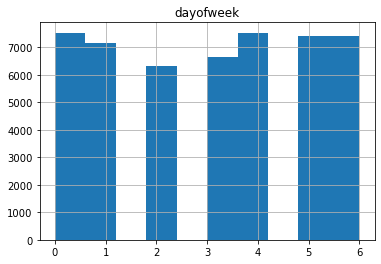

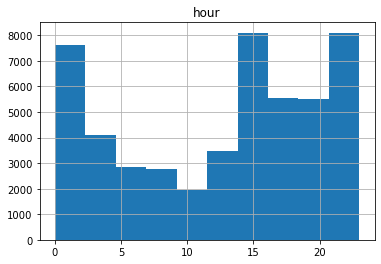

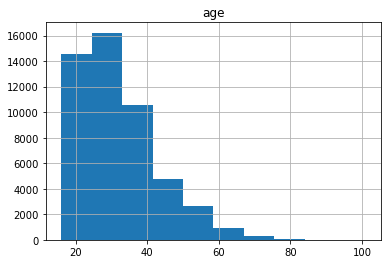

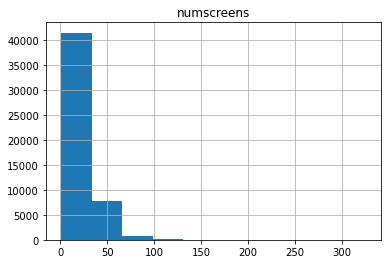

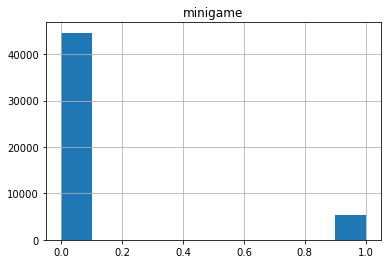

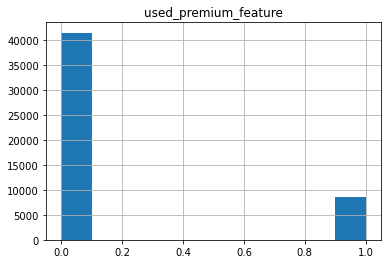

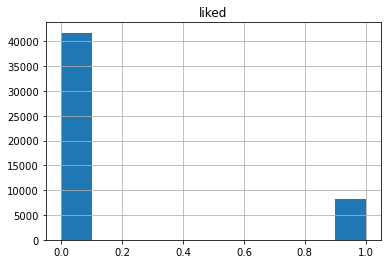

In [22]:
# The simple way
for i in df1.columns:   
        df1.hist(i)

Q. What do you observe

DAY OF THE WEEK: The data distribution is nearly constant with over 7000 users.And the distribution shows that the largest usage occurs on weekends, with a fair amount of usage occurring during the week. 

HOUR: During the day, the lowest usage (only 2000 people) occurs between 8 a.m. and 12 p.m., whilst the largest usage occurs after 9 p.m.

AGE: This distribution is rapidly dwindling.  The majority of our users are between the ages of 10 and 40. The use of mobile data is decreasing as the age groups grow larger.

NUMSCREENS: Usually, 30 screens are browsed at the same time. Users that visit more than 50 screens are in the minority.

MINIGAME: It appears to be a binary value, either true or false. The majority of players play small games, however just 5000 out of 100,000 do not.

PREVIOUSLY USED FEATURES: The majority of users make use of prior features. Around 8000, on the other hand, does not.

LIKED: More than 40000 individuals enjoyed the app, with only about 8000 people disliking it.


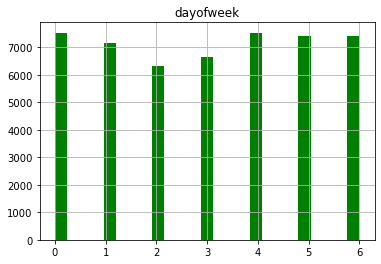

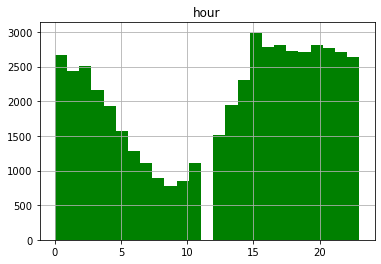

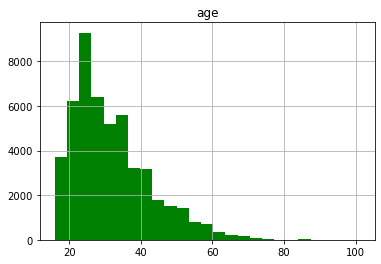

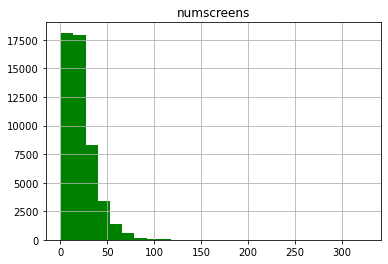

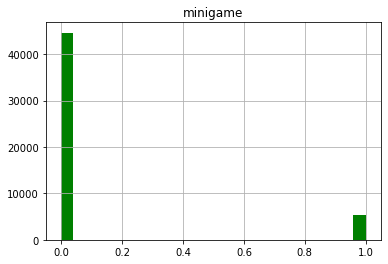

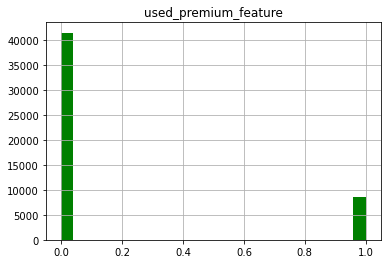

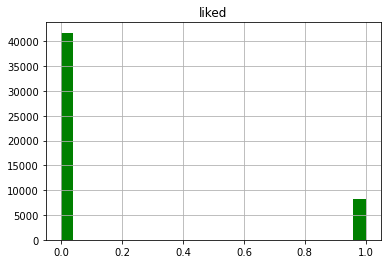

In [23]:
# The complicated way or the nice way 
# use the code from the first project tweak it a little bit and create pretty looking histograms
for i in df1.columns:   
        df1.hist(column=i, bins=25, color = "green")


<AxesSubplot:title={'center':'Correlation with Response Variable'}>

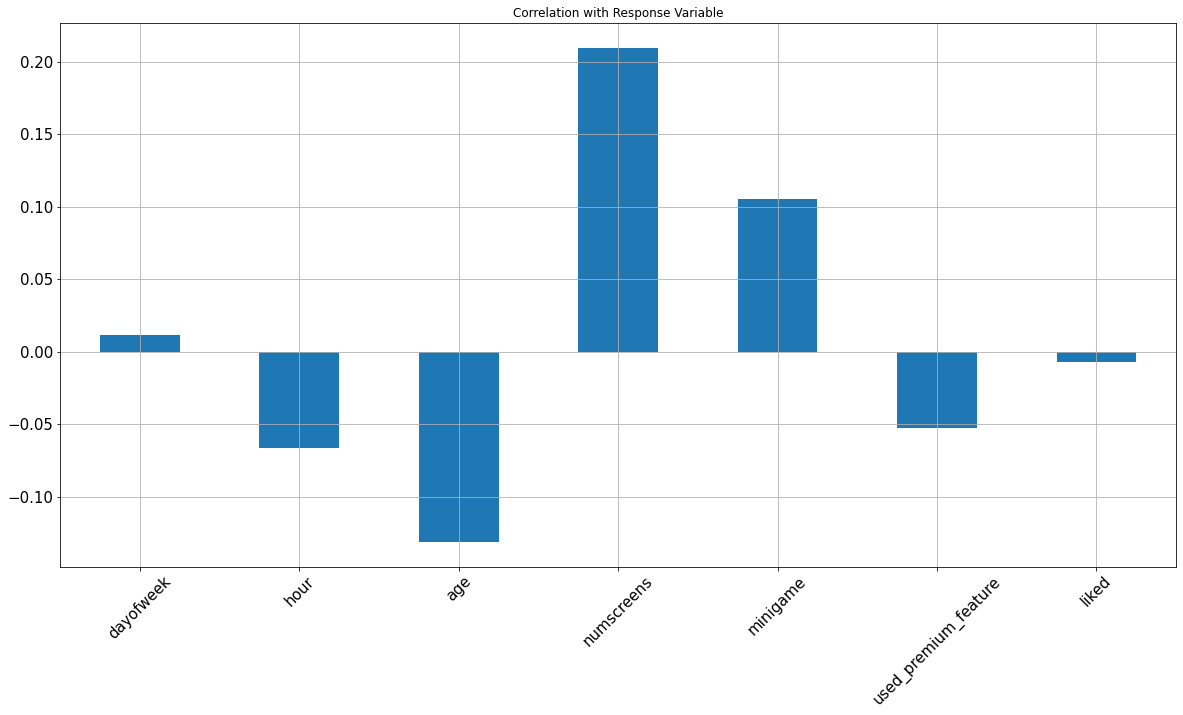

In [24]:
# Correlation Plot with the Response variable
df1.corrwith(df.enrolled).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   fontsize = 15, rot = 45, grid = True)

Q. Comment on the plot

This graph shows how closely the features are related to the output feature (Response variable). All four indicate a negative correlation, which is defined as a link between two variables in which one increases while the other falls, and vice versa.
Hour, age, used premium feature, and liked, for example, are all adversely connected.

The response variable is positively connected with Dayofweek, numscreens, and minigame. When one rises, the other rises with it.

Correlation Plot the nicer way

In [26]:
# Set Background
import seaborn as sns
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = df1.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\srugv\AppData\Local\Temp\ipykernel_14352\1573703089.py:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [27]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

<AxesSubplot:>

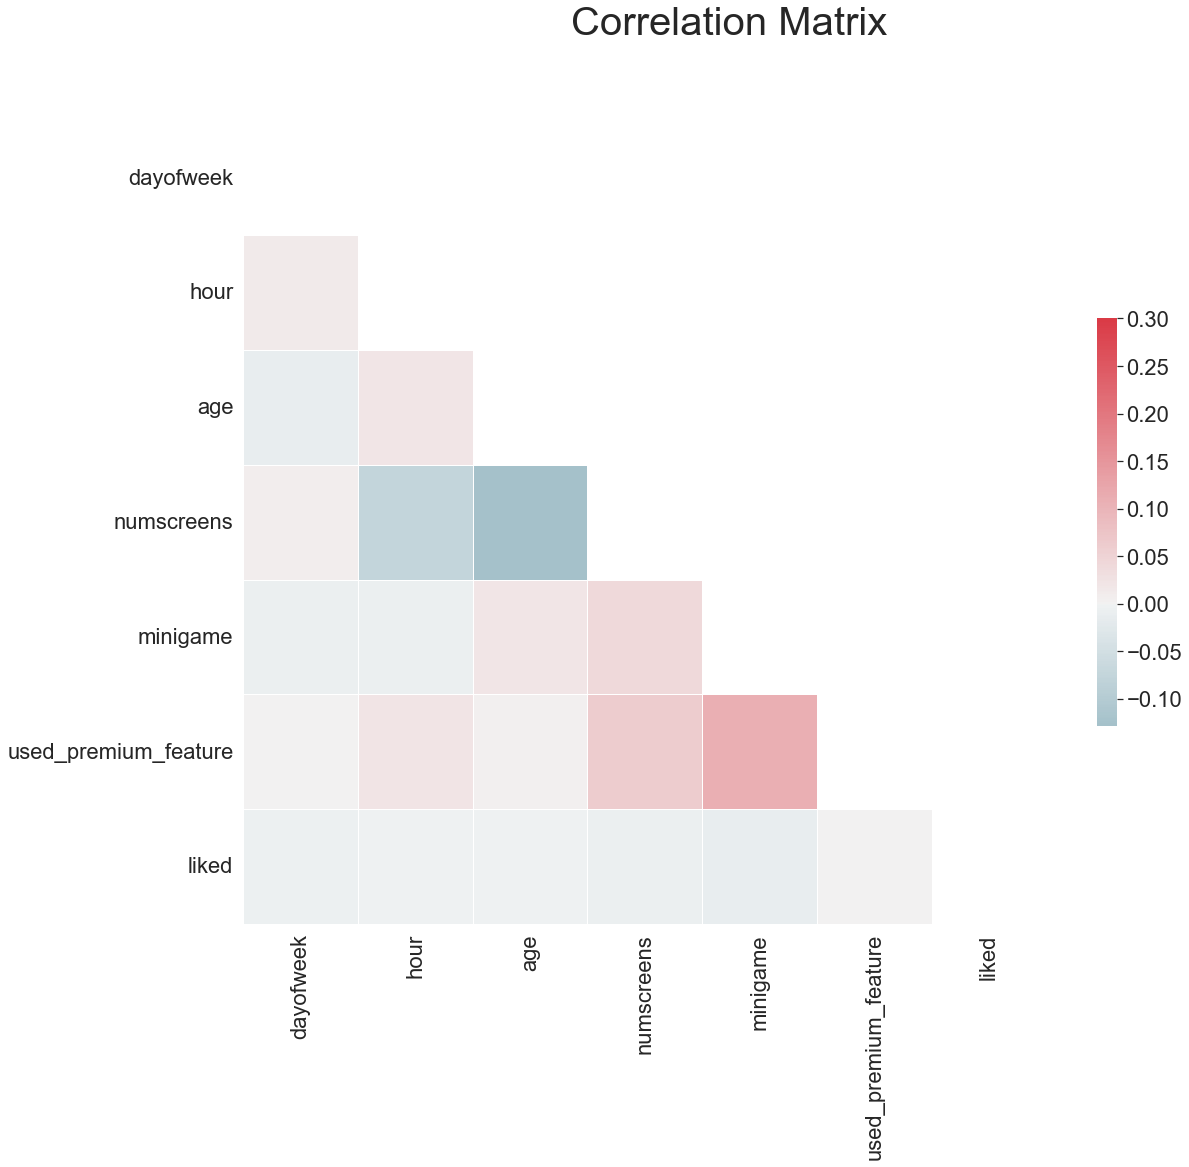

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
#Create a heat map of correlation matrix by using the same code from the first project and tweaking it
# Should look something like what you see below


import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff
import plotly.graph_objs as go
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

# #convert to array
corr_array  = np.array(correlation)


correlation

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

Q. Comment on the heat map

The heatmap indicates that there is no clear relationship between the variables.

There is a favourable link / correlation between features like minigame and used premium feature.

The correlation coefficients along the heatmap's diagonal are all 1, indicating that each variable is perfectly correlated with itself.

Other variables with pearson coefficients of 0.04 and 0.06 are positively connected with numscreens and mini game, numscreen, and used-premiun variables.

Feature Engineering Process

Lets first look at the target variable (enrolled)

In [30]:
df['enrolled'].head

<bound method NDFrame.head of 0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64>

In [31]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [33]:
# Convert date specific variables to datetime format
df['first_open'] = pd.to_datetime(df['first_open'])
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])

In [34]:
# Check for the datatypes
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [35]:
# Calculate the difference in the two dates to give the result in hours

df['difference']=(df['enrolled_date']-df['first_open']).astype('timedelta64[h]')

In [36]:
df.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0,920.0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,0.0


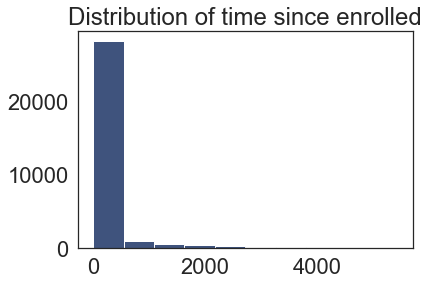

In [37]:
# Plot histogram of the difference variable
plt.hist(df['difference'].dropna(), color ='#3F537D')
plt.title('Distribution of time since enrolled')
plt.show()

Q. Comment on the 

The graph above depicts the distribution of people who have signed up for the app.

It appears that the bulk of users opened the app immediately after enrolling - and only in that hour. The hour difference is roughly 0 hours, as can be seen in the graph

Q. Why are we using dropna() here

To eliminate any variance or erroneous data, we simply deleted all those Null values and did not consider them in the histogram.

DROPNA() allows us to analyse and drop Null values in Rows/Columns in a variety of methods.

Because many data records contain NaN as enrolled data, we utilise dropna() to remove all null or Nan values.


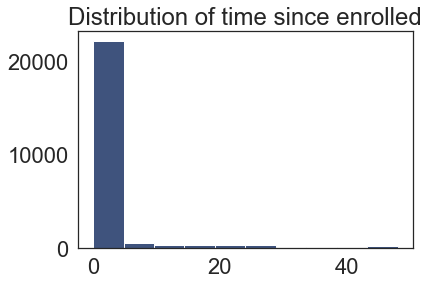

In [38]:
# PLot histogram for only the 48 hrs 
plt.hist(df['difference'].dropna(), color ='#3F537D', range =[0, 48])
plt.title('Distribution of time since enrolled')
plt.show()

Q. Why are we using the range in histogram

As we saw in the previous code, the histogram graph is right skewed, and values after a certain point are nearly null or equal to 0, so we're using ranging here so that we can properly see the data values.

Q. Comment on the new time distribution

The updated temporal distribution gives the information a clear picture and the right amount of skewness. This time distribution is a more comprehensive version of the previous one.

In [41]:
df.loc[df.difference > 48, 'enrolled'] = 0
df['enrolled'].value_counts()

0    25150
1    24850
Name: enrolled, dtype: int64

Q. What is the purpose of the above code

When the difference in the criteria is more than 48, this code sets the Enrolled column's value to 0. This causes that column to be set to zero.


In [42]:
# drop the difference, enrolled date and first open columns from the dataframe

df = df.drop(columns=['difference','enrolled_date','first_open'])
df.head()


,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


Extra Feature Engineering Screens

In [43]:
# Import the most popular screens (screens that the user visited in the first 24 hr. period)
# only one column so convert to an array
top_screens = pd.read_csv("popular_screens.csv").top_screens.values

In [44]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [45]:
# Separate screens into the separate lists
screen_list = top_screens.tolist()
screen_list

['Loan2',
 'location',
 'Institutions',
 'Credit3Container',
 'VerifyPhone',
 'BankVerification',
 'VerifyDateOfBirth',
 'ProfilePage',
 'VerifyCountry',
 'Cycle',
 'idscreen',
 'Credit3Dashboard',
 'Loan3',
 'CC1Category',
 'Splash',
 'Loan',
 'CC1',
 'RewardsContainer',
 'Credit3',
 'Credit1',
 'EditProfile',
 'Credit2',
 'Finances',
 'CC3',
 'Saving9',
 'Saving1',
 'Alerts',
 'Saving8',
 'Saving10',
 'Leaderboard',
 'Saving4',
 'VerifyMobile',
 'VerifyHousing',
 'RewardDetail',
 'VerifyHousingAmount',
 'ProfileMaritalStatus',
 'ProfileChildren ',
 'ProfileEducation',
 'Saving7',
 'ProfileEducationMajor',
 'Rewards',
 'AccountView',
 'VerifyAnnualIncome',
 'VerifyIncomeType',
 'Saving2',
 'Saving6',
 'Saving2Amount',
 'Saving5',
 'ProfileJobTitle',
 'Login',
 'ProfileEmploymentLength',
 'WebView',
 'SecurityModal',
 'Loan4',
 'ResendToken',
 'TransactionList',
 'NetworkFailure',
 'ListPicker']

In [46]:
df=df.copy()

In [47]:
# Map screens to fields. We are adding a , so that we can count the screens because there is always going to be 1 less , for all the screen names

df['screen_list'] = df.screen_list.astype(str) + ','

In [48]:
df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [49]:
for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc + ",", "")

In [50]:
df["other"] = df.screen_list.str.count(",")

In [51]:
df = df.drop(columns=['screen_list'])

In [52]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


# # Create Funnels

In [53]:
# Funnels
# Information is provided to you
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

# Credit monitoring screens
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)
# Credit card screens
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)
 # Loan screens
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)

In [54]:
df.dtypes

user                       int64
dayofweek                  int64
hour                       int32
age                        int64
numscreens                 int64
minigame                   int64
used_premium_feature       int64
enrolled                   int64
liked                      int64
location                   int32
Institutions               int32
VerifyPhone                int32
BankVerification           int32
VerifyDateOfBirth          int32
ProfilePage                int32
VerifyCountry              int32
Cycle                      int32
idscreen                   int32
Splash                     int32
RewardsContainer           int32
EditProfile                int32
Finances                   int32
Alerts                     int32
Leaderboard                int32
VerifyMobile               int32
VerifyHousing              int32
RewardDetail               int32
VerifyHousingAmount        int32
ProfileMaritalStatus       int32
ProfileChildren            int32
ProfileEdu

In [55]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [56]:
df.to_csv('new_appdata.csv', index = False) # Save the cleaned file